In [90]:
%config InlineBackend.figure_format = 'retina'

from scipy.stats import binom, hypergeom
import matplotlib.pyplot as plt
import math
import numpy as np

Original proposal:

* $N$ - all participating nodes
* $S$ - set of shards (where $S_i$ is the $ith$ shard)
* $M$ - committee for a particular shard (where $M_i$ is the committee for the $ith$ shard)
* $H$ - set of all honest nodes

Assumptions:

$$
\frac{|H|}{|N|} > \frac{2}{3}
$$

$$
|N| > |M_i|,  \forall i \in |S|
$$

Therefore we can model the probability of a "correct" shard as:

$$
P\left(\frac{|H_i|}{|M_i|} > \frac{2}{3},  \forall i \in |S|\right)
$$

My assumption is that this is saying: in each shard, map the probability that the honest set of nodes $H_i$ compared to the total $M_i$ is greater than $2/3$.

Then assuming each shard is an independant process:

$$
= \prod\limits_{i \in S} P\left(\frac{|H_i|}{|M_i|}>\frac{2}{3}\right) \\
= \prod\limits_{i \in S} \sum\limits_{j=\lceil 2/3*|M_i| \rceil}^{|M_i|} P\left(\frac{|H_i|}{|M_i|}=j\right)
$$

Where $P\left(\frac{|H_i|}{|M_i|}>\frac{2}{3}\right)$ is defined as the binomial distribution $P_{binom}\left(j; |M_i|, \frac{H}{N}\right)$.

This amounts to saying, (TODO: confirm this with yulong). Given a sample size of |M_i| (can be different from different committees), and a ratio of honest to dishonest nodes $H/N$, find the probability of $X=j$, where $j > \frac{H}{N}*|M_i|$

Experiment is for the following, this is in response to Yulong's assumptions on network security based on a sharding based sampling assumption.


We work with the following assumptions:

1) There is a sharding committee size $C$

2) There are S shards on the network, each shard $S$ has as it's committee size $C$. Therefore the total number of "users" in all shards is $S*C$

3) The same user _is_ allowed to participate in multiple shards. There are no rules regarding uniqueness.

Recall that we want network security, want to model the following question:

Given that there are $S$ shards, with $C$ committee members per shard, and given that users can be in multiple shards. Additionally, define a parameter $\beta := H/N$ where $H$ is the number of honest nodes and $N$ is the number of _total_ nodes in the network. What is the probability that there are _no_ faulty shards in the network.

We can model the individual shard as a binomial distribution $P(k;n,p)$, the probability of $k$ successes given $n$ trials with probability $p$. Assuming that everyone votes, this should be:

\begin{equation}
Pr(k > \beta C) = P(k>\beta C;N,\beta)
= \sum\limits_{k > \beta C}^N P(k;N,\beta)
\end{equation}

Given that we know the probability of success in each shard (as they are the same). We can then measure the probability of success in all shards through a joint distribution:

\begin{equation}
Pr(S) = \prod\limits_{s \in S} Pr_s(k > \beta C)
= \prod\limits_{s \in S} Pr(k > \beta C)
\end{equation}


Since all probabilities are assumed to be the same for each shard

security of network: 0.999999999173184


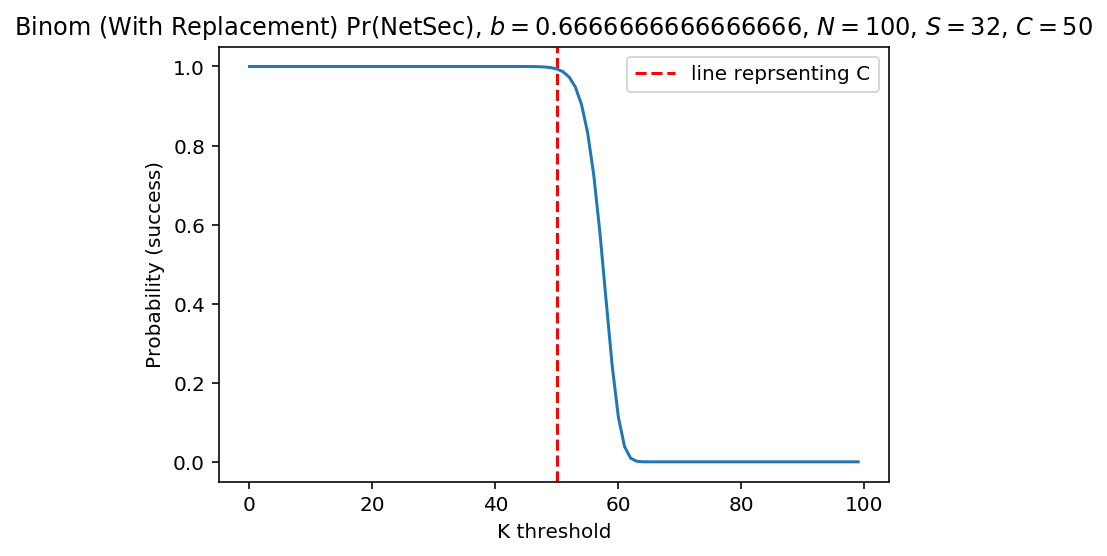

In [91]:
# assume these
N = 100
S = 32
C = 50
beta = 2/3
K_thresh = math.ceil(beta*C)
binom.pmf(K_thresh, N, beta)

# probability of getting more than the required threshold (success)
x = np.arange(K_thresh+1, N, 1)
s_suc = sum(binom.pmf(x, N, beta))
s_glob = s_suc ** S
print("security of network:", s_glob)

# graph depicting security of network as K_thresh increases (binomial)
success_sum = []
for i in range(0, N):
    x_i = np.arange(i, N, 1)
    s_suc_sum = sum(binom.pmf(x_i, N, beta))
    s_glob_sum = s_suc_sum ** S
    success_sum.append(s_glob_sum)
        
plt.title(f"Binom (With Replacement) Pr(NetSec), $b={beta}$, $N={N}$, $S={S}$, $C={C}$")
plt.ylabel("Probability (success)")
plt.xlabel("K threshold")
plt.axvline(x=C, linestyle='--', color='r', label='line reprsenting C')
plt.legend()
plt.plot(success_sum)

In [95]:
# # case: hypergeometric distribution (no replacement)
# [M, n, N] = [20, 7, 12]
# hg_rv = hypergeom(N, math.ceil(beta*N), C)

# # graph depicting security of network as K_thresh increases (binomial)
# success_sum = []
# for i in range(0, N):
#     x_i = np.arange(i, N, 1)
#     s_suc_sum = sum(hg_rv.pmf(x_i))
#     s_glob_sum = s_suc_sum ** S
#     success_sum.append(s_glob_sum)
    
# plt.title(f"Hypergeom (without Replacement) Pr(NetSec), $N={N}$, $S={S}$, $C={C}$")
# plt.ylabel("Probability (success)")
# plt.xlabel("K threshold")
# plt.axvline(x=C, linestyle='--', color='r', label='line reprsenting C')
# plt.legend()
# plt.plot(success_sum)